In [12]:
import numpy as np
import scanpy as sc
import matplotlib.pyplot as plt
import scipy.sparse
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_sample_weight

scanpy==1.10.3 anndata==0.11.0 umap==0.5.7 numpy==1.26.4 scipy==1.14.1 pandas==2.2.3 scikit-learn==1.5.2 statsmodels==0.14.4 pynndescent==0.5.13


In [2]:
data = "C:\\Users\\bence\\Projects\\BIO446\\McKinnon-Rosati-Laboratory\\Project 1\\Data\\adata_lymphatic_ec.h5ad"

In [3]:
adata = sc.read_h5ad(data)
adata.uns['log1p']["base"] = None # bug fix

print(adata.obs['sample'].value_counts())
print()
print('X matrix is sparse:', scipy.sparse.issparse(adata.X))
print('X size =', adata.X.shape)

sample
granuloma1    22
granuloma2    19
granuloma3    16
Name: count, dtype: int64

X matrix is sparse: False
X size = (57, 23693)


In [4]:
unique_celltype_sub = adata.obs['cell_type_edit'].unique()
print(unique_celltype_sub)

['LEC']
Categories (1, object): ['LEC']


In [5]:
replacement_dict = {
    'LEC': 0
}

In [6]:
adata.obs['celltype'] = adata.obs['cell_type_edit'].replace(replacement_dict)

C:\Users\bence\AppData\Local\Temp\ipykernel_181008\975682991.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  adata.obs['celltype'] = adata.obs['cell_type_edit'].replace(replacement_dict)
C:\Users\bence\AppData\Local\Temp\ipykernel_181008\975682991.py:1: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  adata.obs['celltype'] = adata.obs['cell_type_edit'].replace(replacement_dict)


In [7]:
adata.obs['celltype']

AACCGCGAGCCGATTT_sc69_1    0
AACCGCGGTACGCTGC_sc69_1    0
ATAGACCGTCTTGTCC_sc69_1    0
ATGAGGGTCACTTACT_sc69_1    0
CAAGTTGTCTGGCGTG_sc69_1    0
CACATTTAGGACCACA_sc69_1    0
CGCTATCGTCATGCAT_sc69_1    0
CGTCTACCATGCCACG_sc69_1    0
CTCTAATAGACGCACA_sc69_1    0
CTGTTTATCTGGCGTG_sc69_1    0
GAACCTATCCAACCAA_sc69_1    0
GTAGGCCCAATGACCT_sc69_1    0
GTCACAATCGGAATCT_sc69_1    0
GTCGTAAGTTGTCTTT_sc69_1    0
GTGCAGCTCTCGTTTA_sc69_1    0
TCAGATGTCCATGAGT_sc69_1    0
TCATTACTCTCTGTCG_sc69_1    0
TCGAGGCTCACGCGGT_sc69_1    0
TCTCTAATCGCCTGTT_sc69_1    0
TGAGCCGCACCAACCG_sc69_1    0
TGCGGGTCACGGATAG_sc69_1    0
TTAGGCATCGGCCGAT_sc69_1    0
AACGTTGGTGATGCCC_sc70_1    0
AACTGGTTCAGTGCAT_sc70_1    0
ACGCCGAAGGTGCTTT_sc70_1    0
AGAGCGAGTGGTAACG_sc70_1    0
AGGGATGTCACAGTAC_sc70_1    0
AGTTGGTGTAAGGATT_sc70_1    0
CACTCCACACCTTGTC_sc70_1    0
CATCCACGTCCTCCAT_sc70_1    0
CGTTGGGCAGGTGGAT_sc70_1    0
CTGAAACAGCGATTCT_sc70_1    0
GCGCAGTTCTTCAACT_sc70_1    0
GCTCTGTCACCGATAT_sc70_1    0
GGCCGATTCTATCG

In [8]:
print("Unique values in 'celltype' column after replacement:", adata.obs['celltype'].unique())

Unique values in 'celltype' column after replacement: [0]
Categories (1, int64): [0]


In [9]:
cell_type_counts = adata.obs['cell_type_edit'].value_counts()

print("Number of cells in each cell type:")
print(cell_type_counts)

Number of cells in each cell type:
cell_type_edit
LEC    57
Name: count, dtype: int64


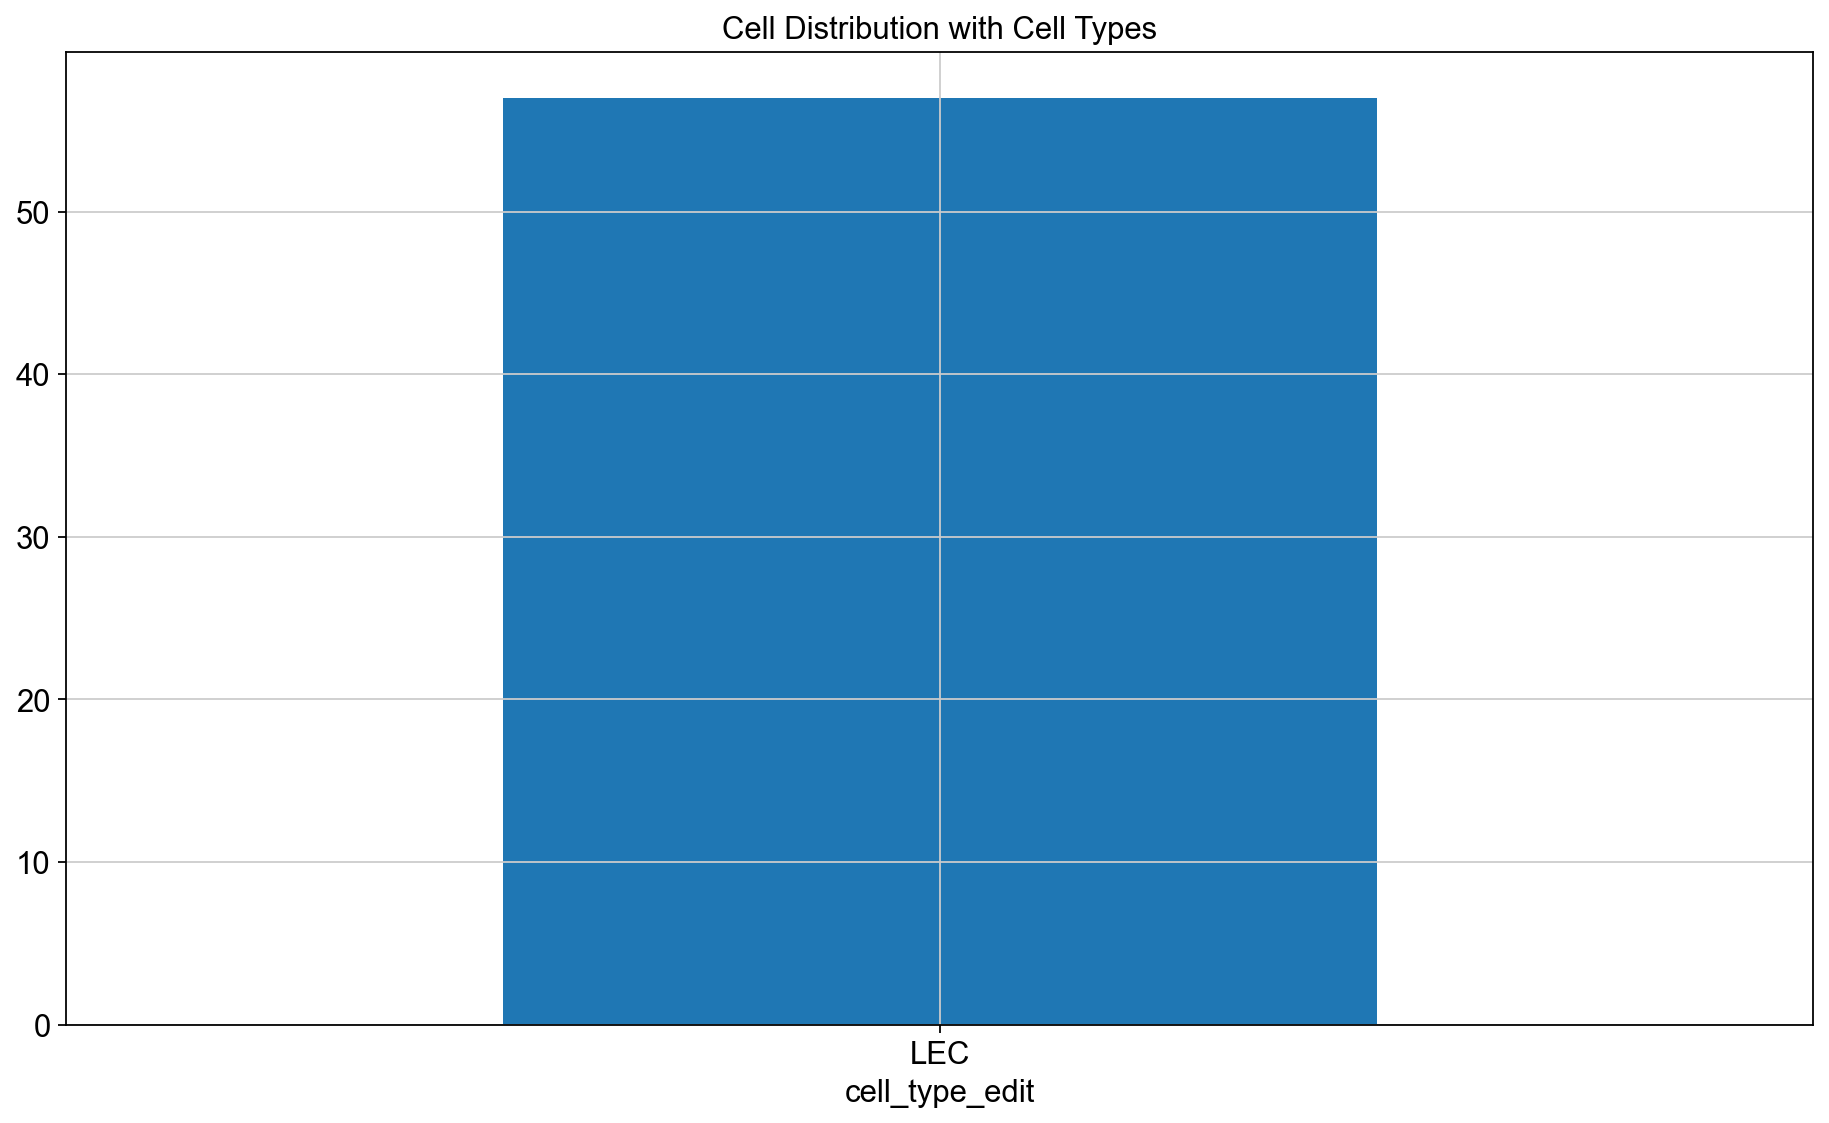

In [10]:
# cell distribution with cell types
y = adata.obs['cell_type_edit']
plt.figure(figsize=(14, 8))
plt.title('Cell Distribution with Cell Types')
y.value_counts().plot(kind='bar', rot=0)
plt.show()

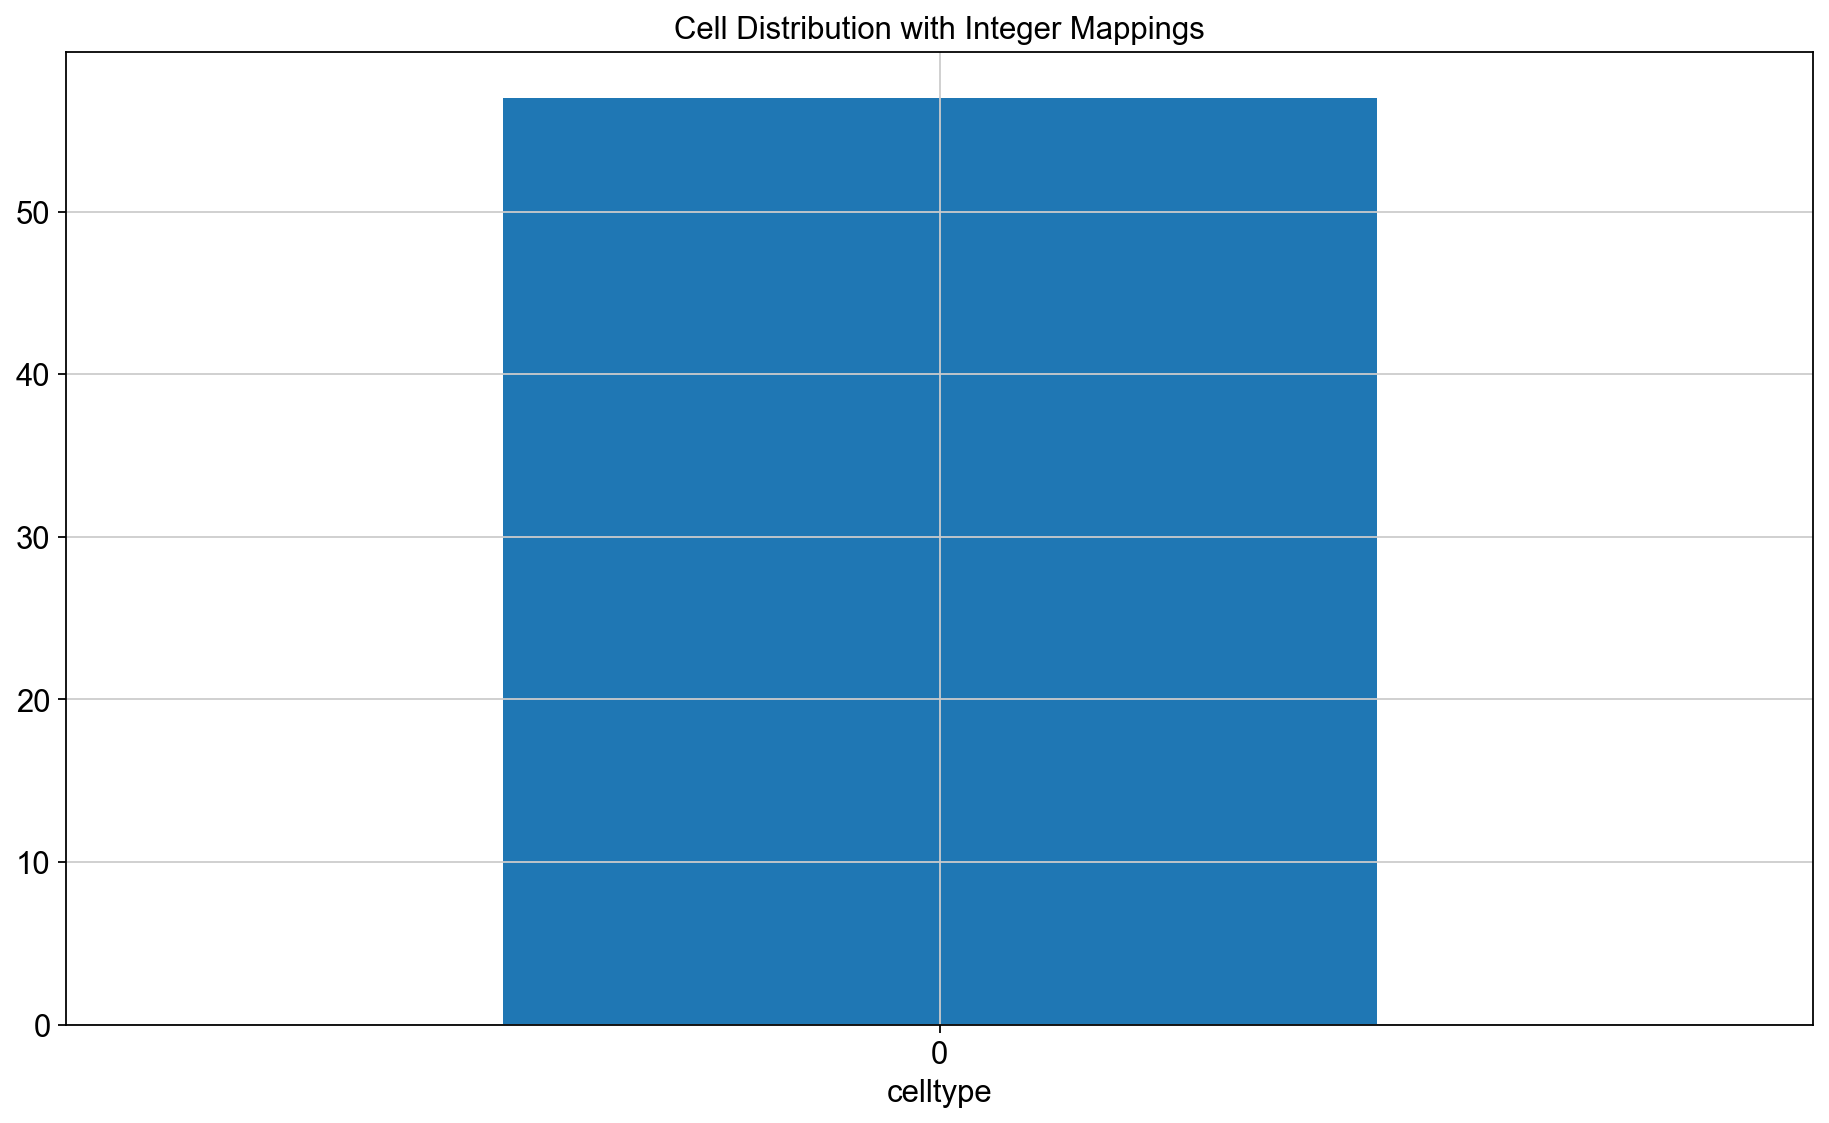

In [11]:
# cell distribution with int mappings
y = adata.obs['celltype']
plt.figure(figsize=(14, 8))
plt.title('Cell Distribution with Integer Mappings')
y.value_counts().plot(kind='bar', rot=0)
plt.show()